In [19]:
import numpy as np 
import pandas as pd
# from sklearn.mixture import GaussianMixture
from xgboost import XGBClassifier
# from sklearn.ensemble
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
data=pd.read_csv('frauds.csv')
data.info()
data.drop(['nameDest','nameOrig'],axis=1,inplace=True)
data=data.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


C:\Users\neeti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


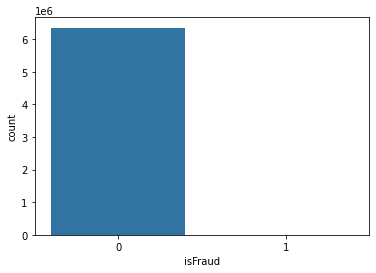

In [30]:
sns.countplot(data['isFraud'])
plt.show()

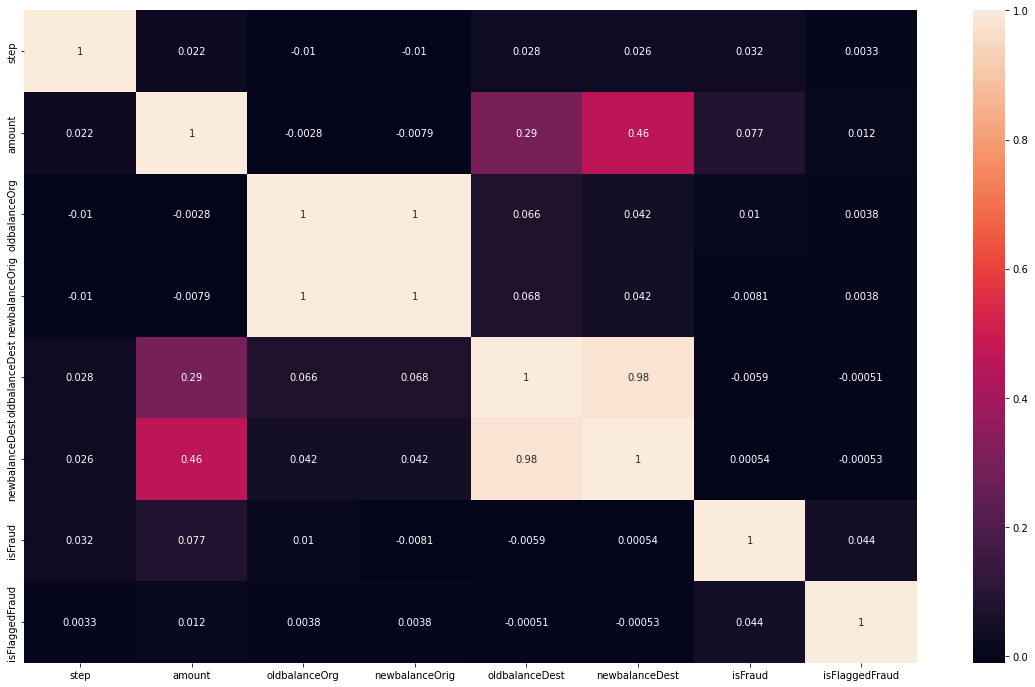

In [29]:
corr=data.corr()
plt.figure(figsize=(20,12))
sns.heatmap(corr,annot=True)
plt.show()

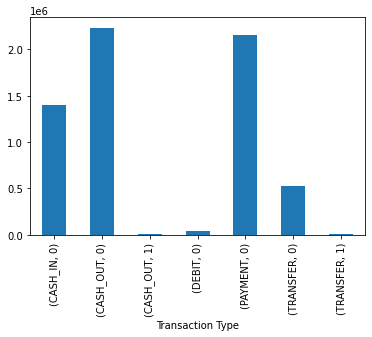

In [27]:
fraud_type = data.groupby(['type','isFraud']).size().plot(kind='bar')
fraud_type.set_xlabel("Transaction Type")

plt.show()

In [3]:
dummy=pd.get_dummies(data[['type']])
data[dummy.columns]=dummy
data.drop('type',inplace=True,axis=1)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 13 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   amount          float64
 2   oldbalanceOrg   float64
 3   newbalanceOrig  float64
 4   oldbalanceDest  float64
 5   newbalanceDest  float64
 6   isFraud         int64  
 7   isFlaggedFraud  int64  
 8   type_CASH_IN    uint8  
 9   type_CASH_OUT   uint8  
 10  type_DEBIT      uint8  
 11  type_PAYMENT    uint8  
 12  type_TRANSFER   uint8  
dtypes: float64(5), int64(3), uint8(5)
memory usage: 418.7 MB


In [5]:
X=data.drop(['isFraud','isFlaggedFraud'],axis=1)
y=data['isFraud']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [20]:
model=XGBClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


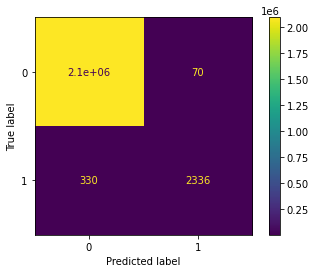

In [22]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.show()